In [1]:
# Import necessary functions from your files
from utils import leaky_relu, linear
from plotting import plot_simulation

In [2]:
def default_params():
    """
    Returns a dictionary of default parameters for the neural dynamics simulation.
    """
    params = {
        # Simulation timing and duration
        "time_steps": 1000,  # Total duration [timesteps]
        "dt": 0.002,  # Timestep size (seconds)

        # Timescales for population dynamics (in seconds)
        "tau_NMDA": 0.1,  # Timescale of the NMDA(E) population
        "tau_GABA": 0.005,  # Timescale of the GABA(I) population
        "tau_AMPA": 0.002,  # Timescale of the AMPA(background)
        "tau_In": 0.002,  # Timescale of the input stimuli

        # Neural population parameters
        "a": 2,  # Gain of the E population
        "b": 10,  # Threshold of the E population
        "d": 0.15,  # Slope of the E population

        # Connectivity strengths
        "w_values": {
            "w_EE": [0., 0.8, 0.6],  # Excitatory-to-excitatory connectivity
            "w_EI": [0.],  # Excitatory-to-inhibitory connectivity
            "w_IE": [0.],  # Inhibitory-to-excitatory specificity
        },

        # Noise parameters
        "noise_mean": 0.,  # Mean of input noise
        "noise_std": 5,  # Standard deviation of input noise

        # Stimulation parameters
        "stimulus_strength": 20,  # Range of stimulus strengths
        "coherence_list": [0., 0.6, -0.2],  # Bias in stimulus input
        "stimulation_period": (0.4, 0.6),  # Fraction of time for the stimulation period

        # Initial conditions
        "initial_rates": {
            "E1": 0,
            "E2": 0,
            "I1": 0,
            "I2": 0,
            "AMPA": 0
        },
        "init_ranges": {
            "E1": (0, 0),
            "E2": (0, 0),
            "I1": (0, 0),
            "I2": (0, 0),
        },

        # Validation thresholds
        "valid_tresh": 15.,
        "valid_low_tresh": 5.,

        # Simulation settings
        "r_init_n": 10,  # Number of initial conditions for E1/E2
        "r_init_n2": 10,  # Number of initial conditions for I1/I2
        "n_trials": 20,  # Number of trials
        "tolerance": 1e-4,  # Tolerance for numerical computations
    }
    return params

# Evidence Accumulation and Performance Criteria: 

Showing the firing rates of excitatory populations for three trials with varying c and wEE 
Only one instance (Center) meets the performance criteria that guarantees a decision is read out (indicated in the subtitle)
Shades denotes the time window in which a signal of strength x is applied on the input to the E populations of the circuit

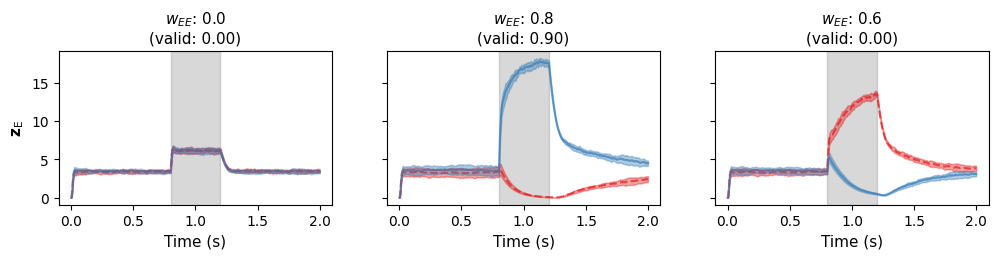

In [3]:
# Initialize default parameters
params = default_params()
# Run the simulation and plot results
valid_trials = plot_simulation(params, f_E=leaky_relu, f_I=linear, to_plot="zE")